## Notebook for the MFT calculation of tether-free systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math

In [2]:
def F_9MER_Bulk(phi, Jb):
    F9MER_bulk = -(phi**2)*2*Jb + (1-phi)*np.log(1-phi) - (phi/9)*np.log(9/phi) - (phi/9)*np.log(193983)
    return F9MER_bulk/phi

In [3]:
phi_list_bulk = np.arange(0.05,1,0.0125)
F9_Jbs_bulk=[]
Jbs_bulk = [0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7] 

for each in Jbs_bulk:
    f9_bulk=[]
    for eac in phi_list_bulk:
        f9_bulk.append(F_9MER_Bulk(eac, each))
    F9_Jbs_bulk.append(f9_bulk)

Text(0.75, -1.3, '$J_p$')

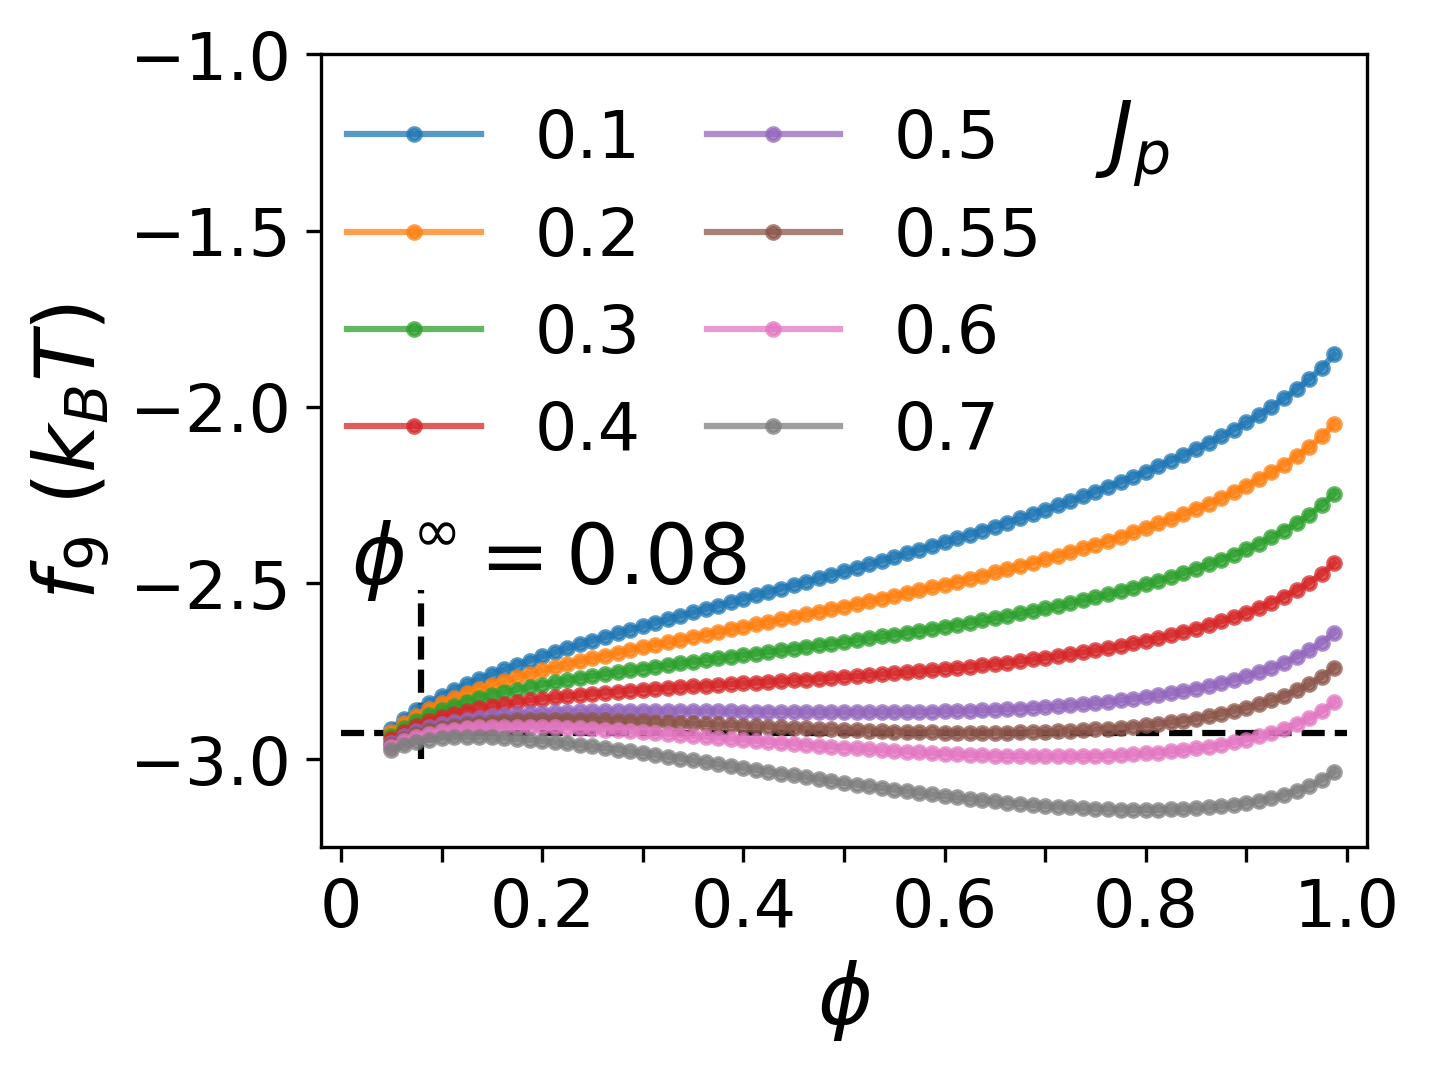

In [5]:
# plot bulk free energy
Bulk_free_energy_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
bulk_F_P = Bulk_free_energy_Plot.add_subplot(111)
for i in range(1,len(F9_Jbs_bulk)):
    bulk_F_P.plot(phi_list_bulk, F9_Jbs_bulk[i], '.-', label=str(round(Jbs_bulk[i],2)), alpha=0.75)
bulk_F_P.set_xticks(np.arange(0,1.05,0.1))
bulk_F_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
bulk_F_P.set_yticks(np.arange(-3.5,-0.9,0.5))
bulk_F_P.set_xlabel('$\phi$',fontsize=20)
bulk_F_P.set_ylabel('$f_9$ ($k_BT$)', fontsize=20)
# bulk_F_P.set_title('free energy per monomer in bulk')
bulk_F_P.set_ylim([-3.25,-1])
bulk_F_P.set_xlim([-0.02,1.02])
bulk_F_P.tick_params(labelsize=16)
bulk_F_P.legend(loc=[0,0.45],fontsize=16,ncol=2,frameon=False,columnspacing=1)
bulk_F_P.hlines(-2.925,0.,1,linestyles='dashed')
bulk_F_P.vlines(0.08,-3.,-2.52,linestyles='dashed')
bulk_F_P.text(0.01,-2.5,'$\phi^{\infty}=0.08$',fontsize=20)
bulk_F_P.text(0.75,-1.3,'$J_p$',fontsize=20)

In [15]:
def Ibulk_integrand(x, Jb, K=1, c9=193983, L=9, f9inf=-3):
    return np.sqrt( 2*K* (-x*x*2*Jb+(1-x)*np.log(1-x)-x/L*np.log(L/x)-x/L*np.log(c9)-f9inf*x) )

In [16]:
phi_list_condensate = np.arange(0.05,1,0.0125)
Jbs_condensate = np.arange(0,0.6,0.05)

In [17]:
I_bulk = []
for jb in Jbs_condensate:
    i_bulk=[]
    for phi0 in phi_list_condensate:
        if phi0<0.08:
            i_bulk.append(integrate.quad(Ibulk_integrand, phi0, 0.08, args=(jb)))
        else:
            i_bulk.append(integrate.quad(Ibulk_integrand, 0.08, phi0, args=(jb)))
    I_bulk.append(i_bulk)

In [21]:
'''The 1st term in F3D, for the loss of conformational entropy of IDP in surface condensate'''
D =5
f9inf=-2.93
L=9
# C9surf = 148563 # D=9
C9surf = 112325 #D=5
# C9surf = 30104 # D=2
# C9surf = 2958 # D=1

F_3D_1 = [] 
for jb in Jbs_condensate:
    f3d_1=[]
    for phi0 in phi_list_condensate:
        f3d_1.append(D*phi0*( (1-phi0)/phi0*np.log(1-phi0)-1/L*np.log(L/phi0)-np.log(C9surf)/L-f9inf ) )
    F_3D_1.append(f3d_1)

F_3D_2 = [] 
for jb in Jbs_condensate:
    f3d_2=[]
    for phi0 in phi_list_condensate:
        f3d_2.append(-jb*D*phi0*phi0*2)
    F_3D_2.append(f3d_2)

Text(0.07, 2.0, '$\\phi^{\\infty}=0.08$')

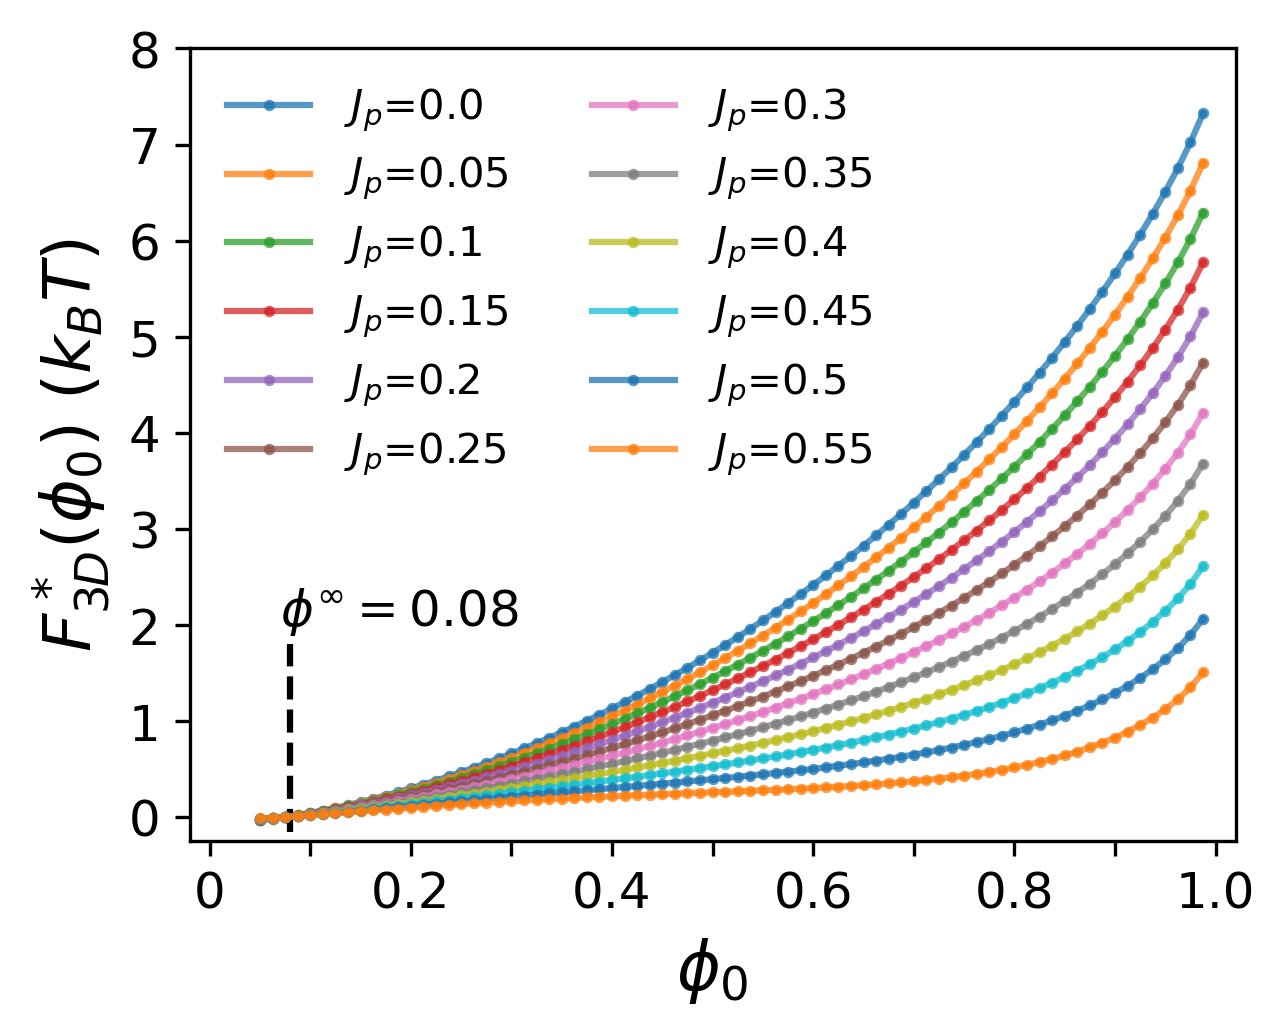

In [22]:
'''Now we combine the above 3 terms to get the value of F3D for different Jb at various phi0'''

F_3D = []
for i in range(len(Jbs_condensate)):
    f3d=[]
    for j in range(len(phi_list_condensate)):
        F_3D_dilute_base = I_bulk[i][2][0]+F_3D_1[i][2]+F_3D_2[i][2]
        f3d.append(I_bulk[i][j][0]+F_3D_1[i][j]+F_3D_2[i][j] - F_3D_dilute_base)
    F_3D.append(f3d)

F_3D_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
F3D_P = F_3D_Plot.add_subplot(111)
for i in range(len(F_3D)):
    F3D_P.plot(phi_list_condensate, F_3D[i], '.-', label='$J_p$='+str(round(np.arange(0,0.6,0.05)[i],2)), alpha=0.75,markersize=3.5)
# plt.plot(phi_list,F9[0],'.')
# plt.plot(phi_list,F9[-1],'.')
F3D_P.set_xticks(np.arange(0.0,1.05,0.1))
F3D_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
F3D_P.set_yticks(np.arange(0,9,1))
F3D_P.set_xlabel('$\phi_0$',fontsize=16)
F3D_P.set_ylabel('$F_{3D}^*(\phi_0)$ ($k_BT$)',fontsize=16)
# F3D_P.set_title('$F_{3D}(\phi_0)$')
F3D_P.set_ylim([-0.25,8])
F3D_P.set_xlim([-0.02,1.02])
F3D_P.tick_params(labelsize=12)
F3D_P.legend(loc='upper left',fontsize=10,ncol=2, frameon=False)
F3D_P.vlines(0.08,-0.15,1.8,linestyles='dashed')
F3D_P.text(0.07,2.,'$\phi^{\infty}=0.08$',fontsize=12)

In [35]:
# m_surf = np.arange(-0.95,1,0.00625) for vary fA calculations
m_surf = np.arange(-0.7,1,0.00625)
Jm=0.3
lambda_m = -0.24
h_teth =  0.36 #kT

def F_mem(mm, Jmem, Z=4):
    a=(1+mm)/2
    return -(Z/2)*(mm**2)*Jmem + (a*np.log(a)+(1-a)*np.log(1-a)) 

F_2D_mem = []
for m in m_surf:
    F_2D_mem.append(F_mem(m, Jm)- lambda_m*m)

F_2D_int = []
for phi0 in phi_list_condensate:
    f2d_int_phi0 = []
    for m in m_surf:
        f2d_int_phi0.append(-h_teth*D*phi0*(1+m)/2)
    F_2D_int.append(f2d_int_phi0)

def findmin(listf2d):
    minval=min(listf2d)
    for i in range(len(listf2d)):
        if listf2d[i]==minval: 
            m_rho_min = [m_surf[i]]
            
    return [minval, m_rho_min]

# Now find the minimum F_2D at each phi0
F_2D=[]

for i in range(len(phi_list_condensate)):
    f2d_phi0 = []
    for j in range(len(m_surf)):
        f2d_phi0.append(F_2D_mem[j]+F_2D_int[i][j])
    F_2D.append(f2d_phi0)

dilute_F2D_base = findmin(F_2D[2])[0]
M_Rho_min_info=[]
F_2D_min = []
for each in F_2D:
    F_2D_min.append(findmin(each)[0]-dilute_F2D_base)
    M_Rho_min_info.append(findmin(each)[1])

'''~~~~~~~~'''

MIN_Locate =[]
for j in np.arange(0,11): 
    minvalinit=1
    for i in np.arange(2,76,1):
        dist=(F_3D[j][i]+F_2D_min[i])
        if dist<=minvalinit:
            minvalinit= (dist-0)
            min_locate = [phi_list_condensate[i], F_3D[j][i]+F_2D_min[i]]
    MIN_Locate.append(min_locate)

Condenstate_densities = [round(eac[0],4) for eac in MIN_Locate]

M_Rho_min_info = []
for each in (MIN_Locate):
    for i in range(len(phi_list_condensate)):
        if phi_list_condensate[i]==each[0]:
            M_Rho_min_info.append(findmin(F_2D[i])[1])

In [32]:
def Mrho_mininfo_to_xAstar_rhostar(mrhomininfo):
    xAstar, rhostar = [], []
    for each in mrhomininfo:
        xAstar.append(each[0]/2+0.5)    
    return [xAstar]

In [36]:
condensate_densities_Jm0d3_h0d36_lamdam_n0d24_D5 = Condenstate_densities.copy() 
xAstar_Jm0d3_h0d36_lamdam_n0d24_D5 = Mrho_mininfo_to_xAstar_rhostar(M_Rho_min_info)[0]

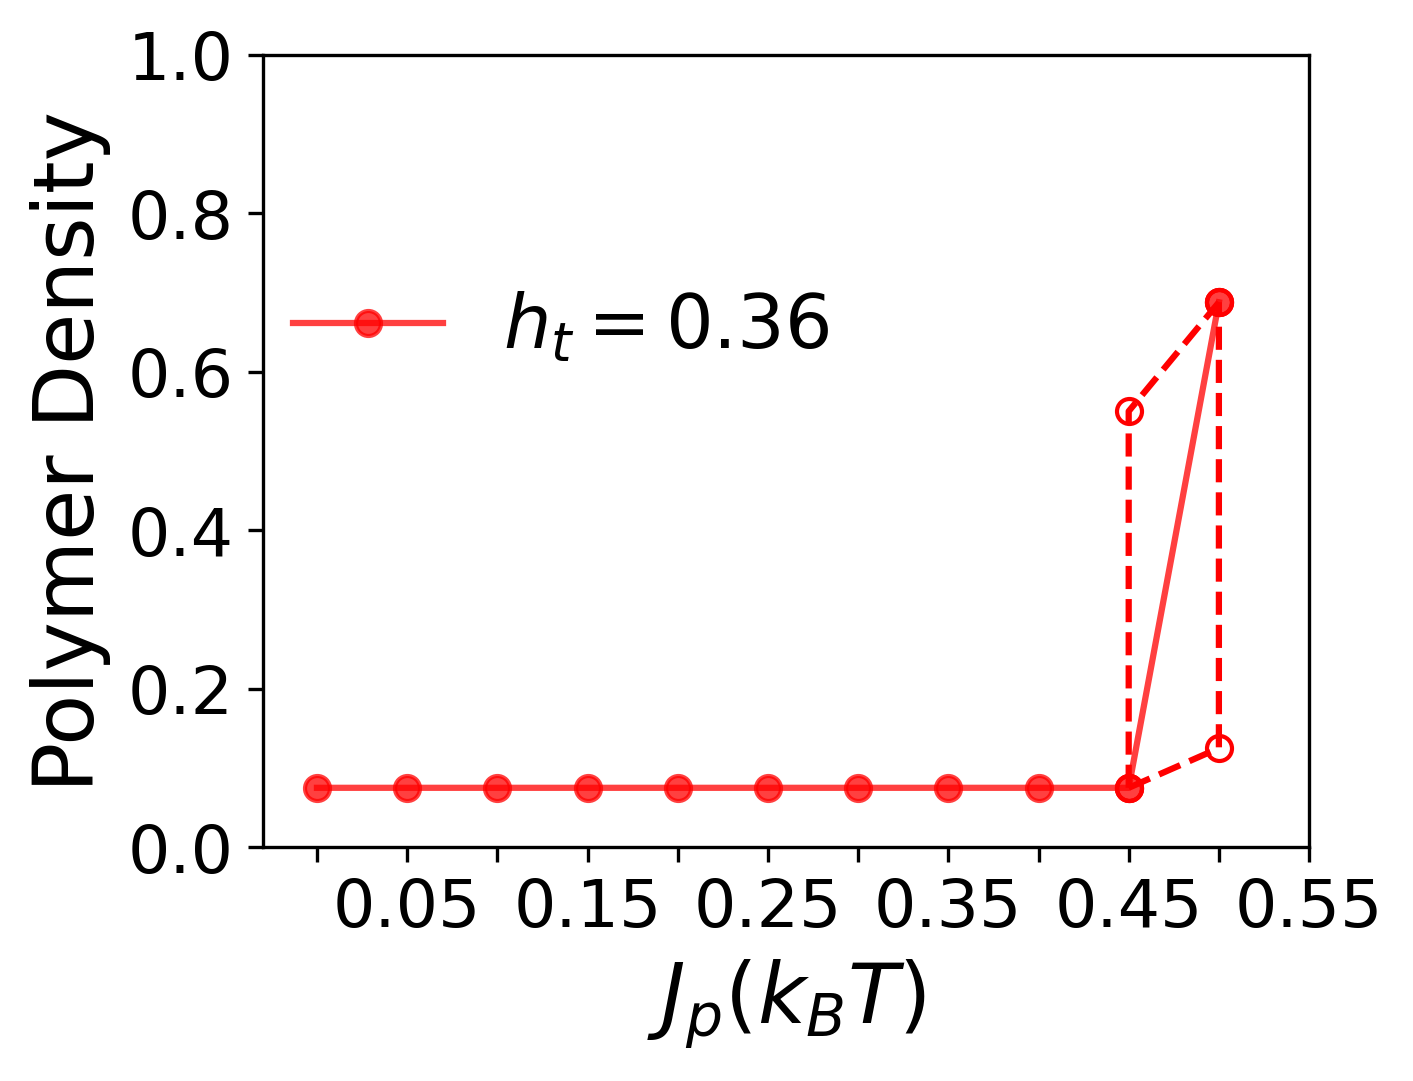

In [39]:
# Plot Fig.5G
sensitivity_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
S_P = sensitivity_Plot.add_subplot(111)

'repeat the above calculations with other parameter values to obtain the corresponding data'
# S_P.plot(Jbs_condensate[:11], condensate_densities_Jm0d3_h0d25_lamdam_n0d24_D5,'.-',alpha=0.75, markersize=12, color='black', label='$h_t=0.25$')
S_P.plot(Jbs_condensate[:11], condensate_densities_Jm0d3_h0d36_lamdam_n0d24_D5,'.-',alpha=0.75, markersize=12, color='red', label='$h_t=0.36$')
# S_P.plot(Jbs_condensate[:11], condensate_densities_Jm0d3_h1_lamdam_n0d24_D5,'.-',alpha=0.75, markersize=12, color='#1f77b4', label='$h_t=1$')

'the data provided in the next two lines can be easily obtained using the code above for the corresponding paramter values'
S_P.plot([0.45,0.45,0.5], [0.075,0.55,0.6875], 'r--o', markersize=6, markeredgecolor='red',markerfacecolor='None')
S_P.plot([0.45,0.5,0.5], [0.075,0.125,0.6875], 'r--o', markersize=6, markeredgecolor='red',markerfacecolor='None')

S_P.set_xticks(np.arange(0.0,0.6,0.05))
S_P.set_xticklabels(['',0.05,'',0.15,'',0.25,'',0.35,'',0.45,'',0.55])
S_P.tick_params(labelsize=16)
# S_P.set_yticks(np.arange(0,9,1))
S_P.set_xlabel('$J_p(k_BT)$',fontsize=20)
S_P.set_ylabel('Polymer Density',fontsize=20)
# S_P.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
S_P.set_ylim([0.,1])
S_P.set_xlim([-0.03,0.55])
S_P.legend(loc=[0,0.57],fontsize=18,ncol=1,frameon=False)

Text(0.7, 6, '$J_p$')

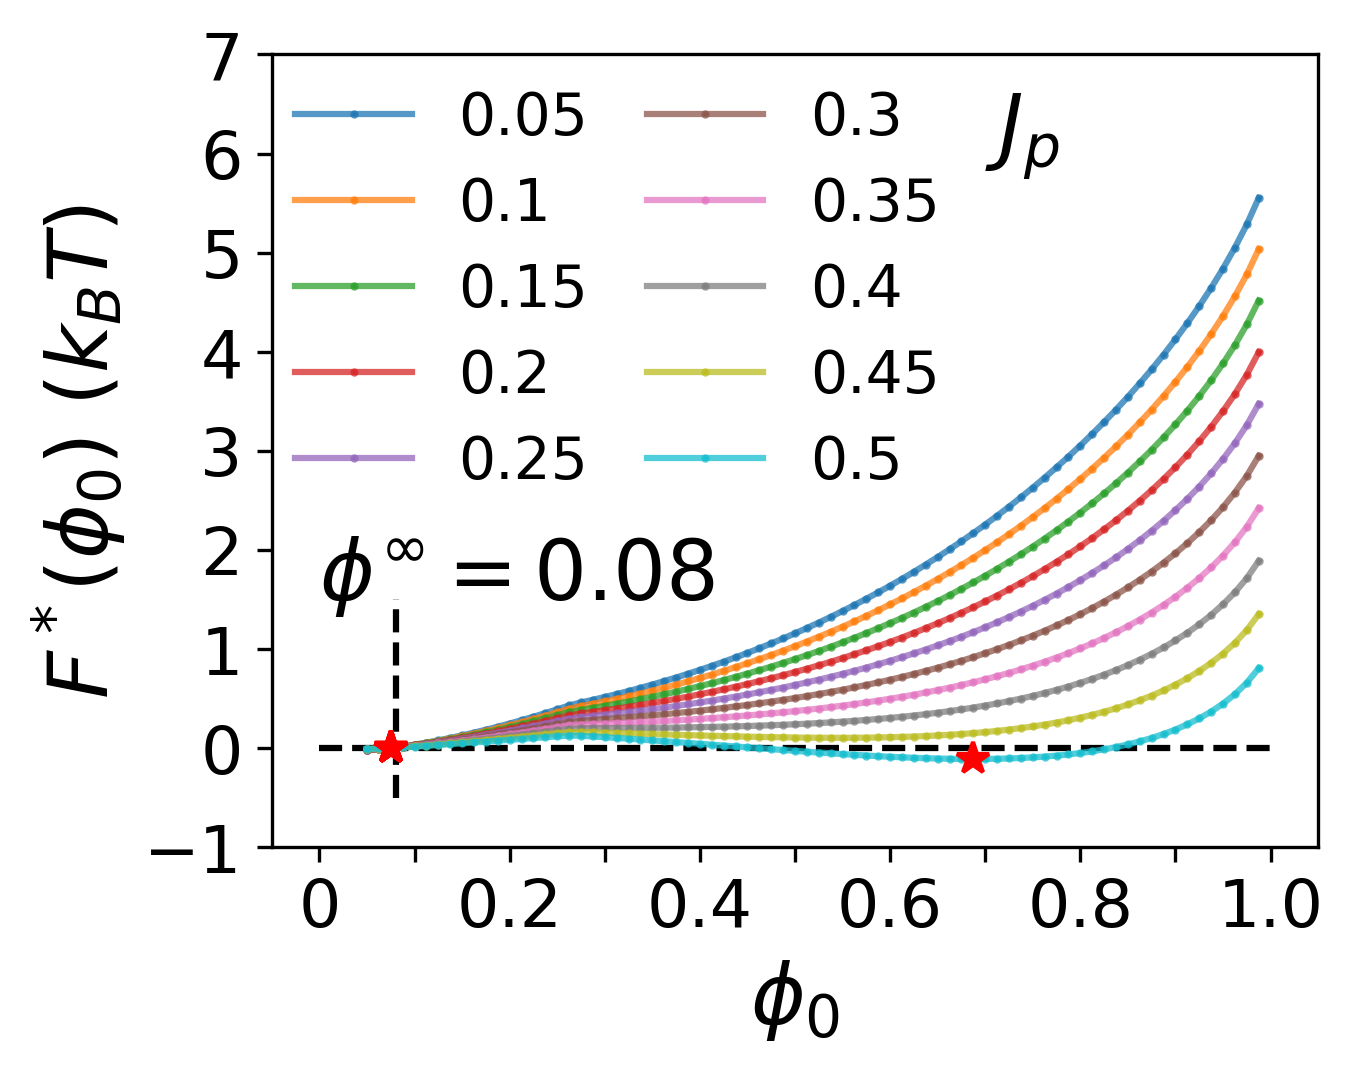

In [41]:
# plot Fig.S14I
F_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
F_P = F_Plot.add_subplot(111)
for i in range(1,len(F_3D)-1):
    F_P.plot(phi_list_condensate, (np.asarray(F_3D[i])+np.asarray(F_2D_min)), '.-', label=str(round(np.arange(0,0.6,0.05)[i],2)), alpha=0.75, markersize=2)

for each in MIN_Locate[1:]:
    F_P.plot(each[0], each[1],'r*',markersize=8)

F_P.set_xticks(np.arange(0,1.05,0.1))
F_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
# F_P.set_yticks(np.arange(-2,4.2,1))
F_P.set_yticks(np.arange(-1,7.1,1))
F_P.set_xlabel('$\phi_0$',fontsize=20)
F_P.set_ylabel('$F^*(\phi_0)$ ($k_BT$)',fontsize=20)
# F_P.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
# F_P.set_ylim([-1,6])
F_P.set_ylim([-1,7])
F_P.tick_params(labelsize=16)
F_P.legend(loc=[0,0.42],fontsize=14,ncol=2,frameon=False, columnspacing=1)
# F_P.vlines(0.08,-1.2,0.5,linestyles='dashed')
F_P.vlines(0.08,-0.5,1.5,linestyles='dashed')

F_P.hlines(0.,0.0,1,linestyles='dashed')
F_P.text(0.0,1.5,'$\phi^{\infty}=0.08$',fontsize=20)
# F_P.text(0.0,-2,'$\phi^{\infty}=0.08$',fontsize=20)
# F_P.text(0.7,4,'$J_p$',fontsize=20)
F_P.text(0.7,6,'$J_p$',fontsize=20)

In [42]:
M_Rho_min_info = []
for each in (MIN_Locate):
    for i in range(len(phi_list_condensate)):
        if phi_list_condensate[i]==each[0]:
            M_Rho_min_info.append(findmin(F_2D[i])[1])

In [43]:
def Mrho_mininfo_to_xAstar_rhostar(mrhomininfo):
    xAstar, rhostar = [], []
    for each in mrhomininfo:
        xAstar.append(each[0]/2+0.5)    
    return [xAstar]

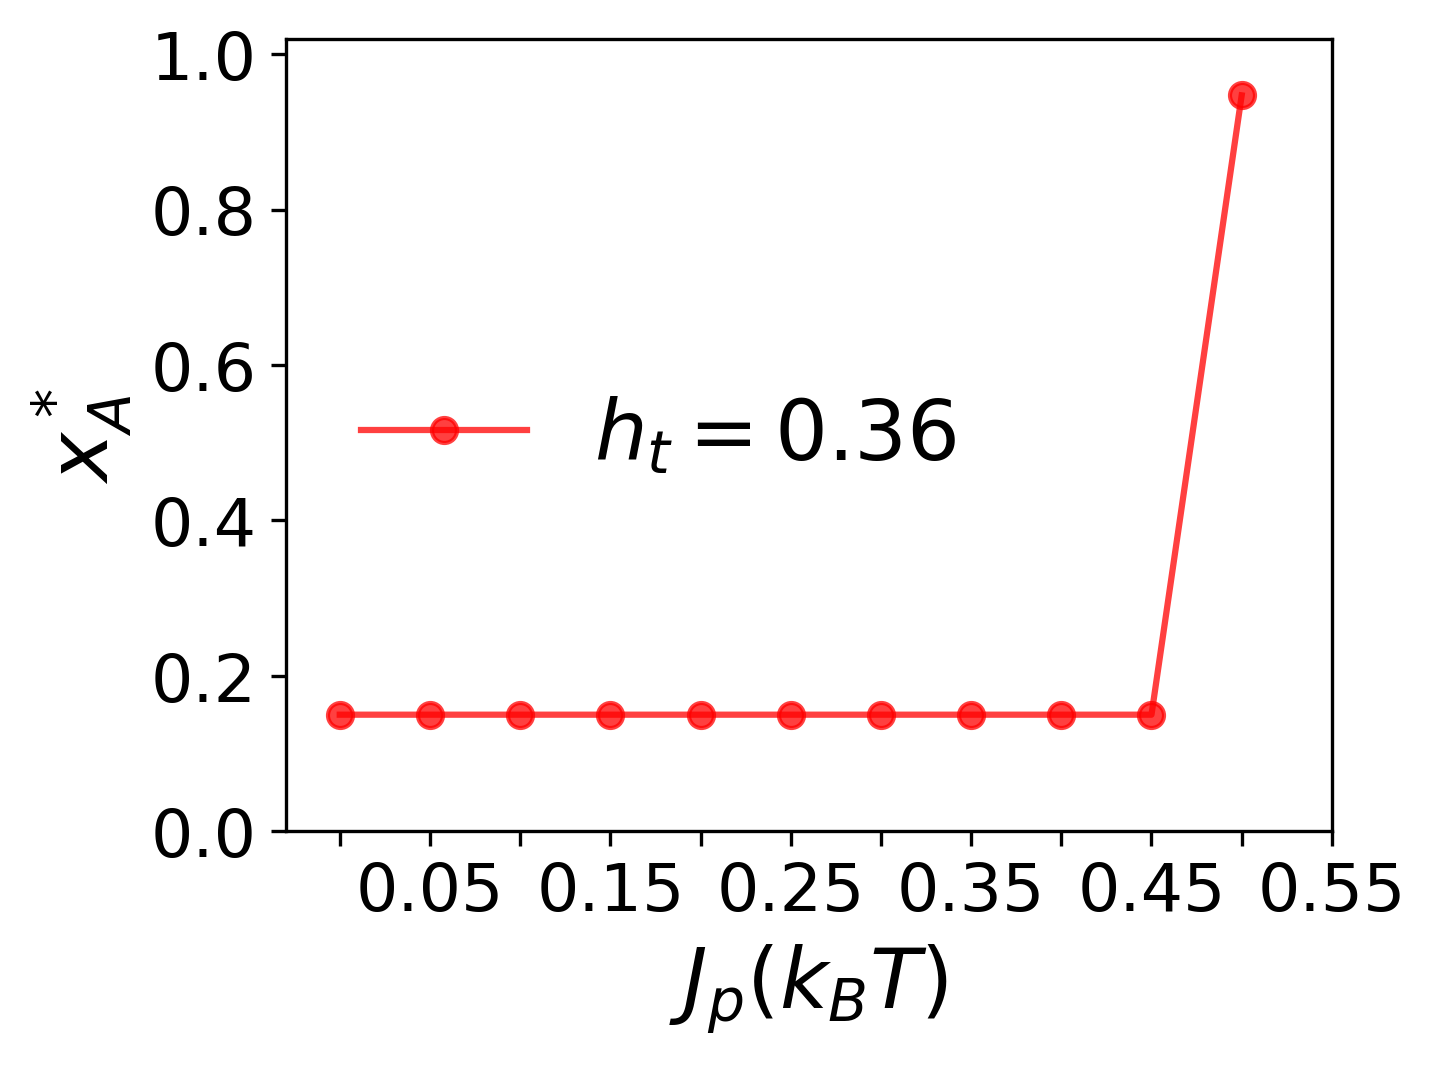

In [47]:
# plot Fig.S13G
sensitivity_Plot_2 = plt.figure(figsize=(4.5,3.5),dpi=300)
S_P2 = sensitivity_Plot_2.add_subplot(111)

'repeat the above calculations with other parameter values to obtain the corresponding data'
# S_P2.plot(Jbs_condensate[:11], xAstar_Jm0d3_h0d25_lamdam_n0d24_D5,'.-',alpha=0.75, markersize=12, color='black', label='$h_t=0.25$')
S_P2.plot(Jbs_condensate[:11], xAstar_Jm0d3_h0d36_lamdam_n0d24_D5,'.-',alpha=0.75, markersize=12, color='red',label='$h_{t}=0.36$')
# S_P2.plot(Jbs_condensate[:11], xAstar_Jm0d3_h1_lamdam_n0d24_D5,'.-',alpha=0.75, markersize=12, color='#1f77b4',label='$h_{t}=1$')

S_P2.tick_params(labelsize=16)
S_P2.set_xticks(np.arange(0.0,0.6,0.05))
S_P2.set_xticklabels(['',0.05,'',0.15,'',0.25,'',0.35,'',0.45,'',0.55])
S_P2.set_yticks(np.arange(0,1.1,0.2))
S_P2.set_xlabel('$J_p(k_BT)$',fontsize=20)
# S_P2.set_ylabel('$R_{up-spin}*$',fontsize=18)
S_P2.set_ylabel('$x_A^*$',fontsize=20)
# S_P2.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
S_P2.set_ylim([0.,1.02])
S_P2.set_xlim([-0.03,0.55])
S_P2.legend(loc='center left',fontsize=20,ncol=1,frameon=False)